In [45]:
#Downloading the dataset directly from kaggle using opendatasets.
!pip install opendatasets

In [46]:
import opendatasets as od

In [47]:
od.download("https://www.kaggle.com/datasets/samuelcortinhas/house-price-prediction-seattle")

Skipping, found downloaded files in ".\house-price-prediction-seattle" (use force=True to force download)


In [48]:
import os
data_dir= '.\house-price-prediction-seattle'
os.listdir(data_dir)

['.ipynb_checkpoints']

In [49]:
#Importing the datset
import pandas as pd
dataset = pd.read_csv("train.csv")
dataset.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [50]:
dataset.shape

(2016, 8)

In [51]:
dataset= dataset.drop('size_units',axis=1)

In [52]:
dataset = dataset.drop('lot_size_units', axis=1)

In [53]:
dataset.head()

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.00,98144,795000.0
1,4,2.0,2240.0,0.31,98106,915000.0
2,4,3.0,2040.0,3783.00,98107,950000.0
3,4,3.0,3800.0,5175.00,98199,1950000.0
4,2,2.0,1042.0,NaN,98102,950000.0


In [54]:
dataset.shape

(2016, 6)

In [55]:
# Removing the NaN values from the dataset
dataset = dataset.dropna(axis=1)

In [56]:
dataset.shape

(2016, 5)

In [57]:
#Identifying the unique number of values in the dataset
dataset.nunique()

beds         11
baths        16
size        879
zip_code     28
price       767
dtype: int64

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   float64
 3   zip_code  2016 non-null   int64  
 4   price     2016 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 78.9 KB


In [59]:
dataset.describe()

,beds,baths,size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07


In [60]:
# Splitting the data into target variable and independent variable
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values
#X = dataset.drop(['price'], axis = 1)
#y = dataset['price']

In [61]:
x

array([[3.0000e+00, 2.5000e+00, 2.5900e+03, 9.8144e+04],
       [4.0000e+00, 2.0000e+00, 2.2400e+03, 9.8106e+04],
       [4.0000e+00, 3.0000e+00, 2.0400e+03, 9.8107e+04],
       ...,
       [4.0000e+00, 2.0000e+00, 2.1400e+03, 9.8199e+04],
       [2.0000e+00, 2.0000e+00, 7.9500e+02, 9.8103e+04],
       [3.0000e+00, 2.0000e+00, 1.7100e+03, 9.8133e+04]])

In [62]:
y

array([ 795000.,  915000.,  950000., ..., 1150000.,  590000.,  659000.])

In [63]:
#splitting the arrays into train dataset and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [64]:
print(x_train)

[[5.0000e+00 3.0000e+00 2.3100e+03 9.8106e+04]
 [5.0000e+00 3.0000e+00 2.8200e+03 9.8136e+04]
 [2.0000e+00 1.0000e+00 9.1000e+02 9.8117e+04]
 ...
 [3.0000e+00 4.5000e+00 3.7600e+03 9.8199e+04]
 [3.0000e+00 2.5000e+00 2.0800e+03 9.8117e+04]
 [3.0000e+00 3.0000e+00 1.8800e+03 9.8107e+04]]


In [65]:
print(y_train)

[ 780000.  900000.  825000. ... 1570000.  977000.  999950.]


In [66]:
print(x_test)

[[2.0000e+00 1.0000e+00 1.7600e+03 9.8116e+04]
 [6.0000e+00 4.0000e+00 3.2800e+03 9.8118e+04]
 [4.0000e+00 3.5000e+00 2.4780e+03 9.8115e+04]
 ...
 [4.0000e+00 3.0000e+00 2.6600e+03 9.8117e+04]
 [3.0000e+00 2.0000e+00 2.2700e+03 9.8122e+04]
 [4.0000e+00 2.0000e+00 2.6300e+03 9.8115e+04]]


In [67]:
print(y_test)

[ 715000.  999950. 1580000.  525000. 3150000. 1395000.  605000.  700000.
  799000.  515000.  877000.  222000. 1050000.  750000.  700000.  369950.
  785000.  509950.  710000. 2250000. 2000000.  330000.  829000. 1025000.
  539000.  975000. 1350000.  575000.  700000.  355000.  820000.  745000.
 2100000.  871000.  396000.  583000.  820000.  675000.  787950. 1050000.
  779000. 1165000.  699950. 1950000. 1051500. 1095000.  553500.  709600.
  849000. 2320000.  765000.  999950.  740000.  919000. 1295000.  390000.
  490000.  525000.  365000. 1130000.  464000.  820000.  620000.  730000.
 1981000.  445000.  315000.  930000.  439900.  858000.  734999.  850000.
  920000.  325100.  945000.  425000.  489000.  860000.  665000.  915000.
  655000. 1484000.  888000.  625000. 1375000.  850000.  986500.  360000.
 2050000.  500000.  825000. 1270000.  500000. 1625000. 1650000.  925000.
 3630000.  455000.  399999.  990000.  778000.  685000. 1025000.  974999.
  429900.  520000.  825000. 2695000. 1850000.  6650

In [68]:
#training the linear regression model using the training sets
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [69]:
x_test

array([[2.0000e+00, 1.0000e+00, 1.7600e+03, 9.8116e+04],
       [6.0000e+00, 4.0000e+00, 3.2800e+03, 9.8118e+04],
       [4.0000e+00, 3.5000e+00, 2.4780e+03, 9.8115e+04],
       ...,
       [4.0000e+00, 3.0000e+00, 2.6600e+03, 9.8117e+04],
       [3.0000e+00, 2.0000e+00, 2.2700e+03, 9.8122e+04],
       [4.0000e+00, 2.0000e+00, 2.6300e+03, 9.8115e+04]])

In [70]:
#predicting the test results
y_pred = regressor.predict(x_test)
y_pred

array([1047284.47715151, 1565544.94590735, 1334162.54496366,
       1124125.25244355, 1813850.51941919, 1462047.08500719,
        717100.09759402,  665310.46632868,  980781.4081713 ,
        751835.84285045, 1281595.9292286 ,  549110.08297211,
        814145.25847876,  623357.66886902,  964462.56614774,
        730367.92278588,  755945.39176613,  593534.27202404,
        812818.30636132, 1777407.28823215, 1650401.85625422,
        651995.09030712,  718581.90114534, 1314599.25339156,
       1003942.72152019, 1034764.55808455,  833417.05977118,
        453190.30983043,  866160.89272785,  582812.74859214,
        899882.86997628,  878461.87952065, 1165811.17418194,
       1590028.01237983,  484087.14051038,  862042.32423818,
        674946.09833843,  719638.79817051,  537837.17475635,
        868695.79271263,  803582.34509867, 1076626.93433976,
       1073797.40793264, 2419507.97551501,  982377.45031571,
        932552.67262834,  476214.94361413,  727164.39474779,
        982550.06226695,

In [71]:
y_test

array([ 715000.,  999950., 1580000.,  525000., 3150000., 1395000.,
        605000.,  700000.,  799000.,  515000.,  877000.,  222000.,
       1050000.,  750000.,  700000.,  369950.,  785000.,  509950.,
        710000., 2250000., 2000000.,  330000.,  829000., 1025000.,
        539000.,  975000., 1350000.,  575000.,  700000.,  355000.,
        820000.,  745000., 2100000.,  871000.,  396000.,  583000.,
        820000.,  675000.,  787950., 1050000.,  779000., 1165000.,
        699950., 1950000., 1051500., 1095000.,  553500.,  709600.,
        849000., 2320000.,  765000.,  999950.,  740000.,  919000.,
       1295000.,  390000.,  490000.,  525000.,  365000., 1130000.,
        464000.,  820000.,  620000.,  730000., 1981000.,  445000.,
        315000.,  930000.,  439900.,  858000.,  734999.,  850000.,
        920000.,  325100.,  945000.,  425000.,  489000.,  860000.,
        665000.,  915000.,  655000., 1484000.,  888000.,  625000.,
       1375000.,  850000.,  986500.,  360000., 2050000.,  5000

In [72]:
print(type(y_pred))
print(y_train[7])
print(y_test[7])
print(y_pred[7])

<class 'numpy.ndarray'>
942000.0
700000.0
665310.4663286805


In [73]:
print(type(y_pred))
print(y_train[555])
print(y_test[555])
print(y_pred[555])

<class 'numpy.ndarray'>
610000.0
1460000.0
1141853.8246315122


In [74]:
print(type(y_pred))
print(y_train[:5])
print(y_test[:5])
print(y_pred[:5])

<class 'numpy.ndarray'>
[780000. 900000. 825000. 750000. 315000.]
[ 715000.  999950. 1580000.  525000. 3150000.]
[1047284.47715151 1565544.94590735 1334162.54496366 1124125.25244355
 1813850.51941919]


In [75]:
import matplotlib.pyplot as plt

In [76]:
print(len(x_train))
print(x_train.shape)

1411
(1411, 4)


In [77]:
print(len(y_train))
print(y_train.shape)

1411
(1411,)


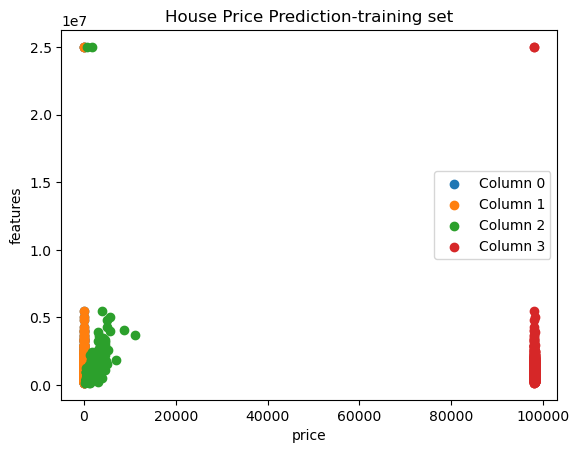

In [78]:
#visualizing the training set results
for i in range(x.shape[1]):  
    plt.scatter(x_train[:, i], y_train, label=f'Column {i}')

plt.title('House Price Prediction-training set')
plt.xlabel('price')
plt.ylabel('features')
plt.legend()
plt.show()

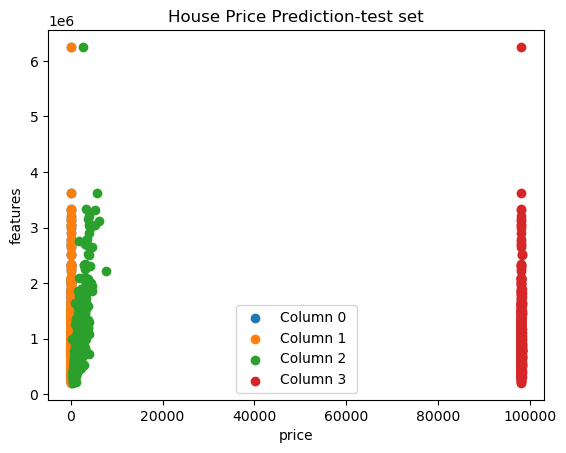

In [79]:
#visualizing the test set results
for i in range(x.shape[1]): 
    plt.scatter(x_test[:, i], y_test,label=f'Column {i} ')

#plt.plot(x_test[:len(y_pred)], y_pred, marker='x')

plt.title('House Price Prediction-test set')
plt.xlabel('price')
plt.ylabel('features')
plt.legend()
plt.show()

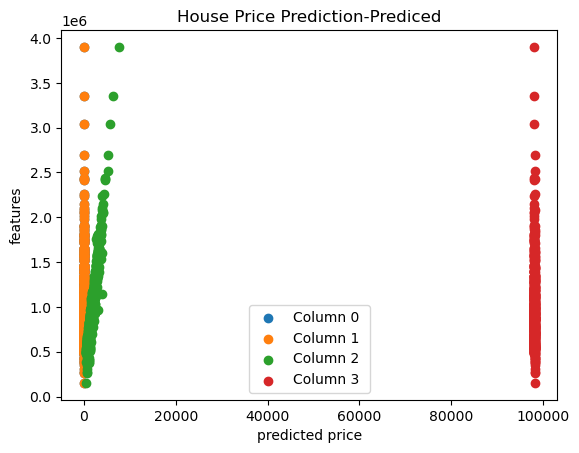

In [80]:
#visualizing the Predicted results
for i in range(x.shape[1]): 
    plt.scatter(x_test[:, i], y_pred,label=f'Column {i} ')
    
plt.title('House Price Prediction-Prediced')
plt.xlabel('predicted price')
plt.ylabel('features')
plt.legend()
plt.show()

In [81]:
#The values in the above plots are distributed equally around zero. Hence,Linear Assumption is satisfied.

In [82]:
#obtaining the linear regression equation with the values of coefficients
print(regressor.coef_)

[-102291.91067016   43532.26082056     528.44851258   -3205.20507092]


In [83]:
print(regressor.intercept_)

314760167.39424556
